<a href="https://colab.research.google.com/github/josecamachobravo/CienciaDatos/blob/main/Act_Modelo_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [15]:
data_url = "https://github.com/josecamachobravo/CienciaDatos/raw/main/CienciaDatos/CNPV2018_5PER_A2_05.csv"
df = pd.read_csv(data_url)

# Muestra una vista previa de los datos
print(df.head())

   TIPO_REG  U_DPTO  U_MPIO  UA_CLASE  COD_ENCUESTAS  U_VIVIENDA  P_NROHOG  \
0         5       5       1         1           3626           4         1   
1         5       5       1         1           3626           4         1   
2         5       5       1         1           3626           4         1   
3         5       5       1         1           3626           4         1   
4         5       5       1         1           3626           4         1   

   P_NRO_PER  P_SEXO  P_EDADR  ...  PA1_THSV  PA2_HSVH  PA3_HSVM  PA_HFC  \
0          1       1        5  ...       NaN       NaN       NaN     NaN   
1          2       2       11  ...       2.0       1.0       1.0     2.0   
2          3       2        7  ...       1.0       0.0       1.0     2.0   
3          4       2        1  ...       NaN       NaN       NaN     NaN   
4          5       1       11  ...       NaN       NaN       NaN     NaN   

   PA1_THFC  PA2_HFCH  PA3_HFCM  PA_UHNV  PA1_MES_UHNV  PA2_ANO_UHNV  
0  

In [16]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96797 entries, 0 to 96796
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIPO_REG          96797 non-null  int64  
 1   U_DPTO            96797 non-null  int64  
 2   U_MPIO            96797 non-null  int64  
 3   UA_CLASE          96797 non-null  int64  
 4   COD_ENCUESTAS     96797 non-null  int64  
 5   U_VIVIENDA        96797 non-null  int64  
 6   P_NROHOG          96797 non-null  int64  
 7   P_NRO_PER         96797 non-null  int64  
 8   P_SEXO            96797 non-null  int64  
 9   P_EDADR           96797 non-null  int64  
 10  P_PARENTESCOR     96797 non-null  int64  
 11  PA1_GRP_ETNIC     96797 non-null  int64  
 12  PA11_COD_ETNIA    115 non-null    float64
 13  PA12_CLAN         6 non-null      float64
 14  PA21_COD_VITSA    2 non-null      float64
 15  PA22_COD_KUMPA    2 non-null      float64
 16  PA_HABLA_LENG     148 non-null    float6

Index(['TIPO_REG', 'U_DPTO', 'U_MPIO', 'UA_CLASE', 'COD_ENCUESTAS',
       'U_VIVIENDA', 'P_NROHOG', 'P_NRO_PER', 'P_SEXO', 'P_EDADR',
       'P_PARENTESCOR', 'PA1_GRP_ETNIC', 'PA11_COD_ETNIA', 'PA12_CLAN',
       'PA21_COD_VITSA', 'PA22_COD_KUMPA', 'PA_HABLA_LENG', 'PA1_ENTIENDE',
       'PB_OTRAS_LENG', 'PB1_QOTRAS_LENG', 'PA_LUG_NAC', 'PA_VIVIA_5ANOS',
       'PA_VIVIA_1ANO', 'P_ENFERMO', 'P_QUEHIZO_PPAL', 'PA_LO_ATENDIERON',
       'PA1_CALIDAD_SERV', 'CONDICION_FISICA', 'P_ALFABETA', 'PA_ASISTENCIA',
       'P_NIVEL_ANOSR', 'P_TRABAJO', 'P_EST_CIVIL', 'PA_HNV', 'PA1_THNV',
       'PA2_HNVH', 'PA3_HNVM', 'PA_HNVS', 'PA1_THSV', 'PA2_HSVH', 'PA3_HSVM',
       'PA_HFC', 'PA1_THFC', 'PA2_HFCH', 'PA3_HFCM', 'PA_UHNV', 'PA1_MES_UHNV',
       'PA2_ANO_UHNV'],
      dtype='object')

In [17]:
# Verificar si hay valores nulos en el conjunto de datos
print(df.isnull().sum())

TIPO_REG                0
U_DPTO                  0
U_MPIO                  0
UA_CLASE                0
COD_ENCUESTAS           0
U_VIVIENDA              0
P_NROHOG                0
P_NRO_PER               0
P_SEXO                  0
P_EDADR                 0
P_PARENTESCOR           0
PA1_GRP_ETNIC           0
PA11_COD_ETNIA      96682
PA12_CLAN           96791
PA21_COD_VITSA      96795
PA22_COD_KUMPA      96795
PA_HABLA_LENG       96649
PA1_ENTIENDE        96699
PB_OTRAS_LENG       96649
PB1_QOTRAS_LENG     96779
PA_LUG_NAC              0
PA_VIVIA_5ANOS          0
PA_VIVIA_1ANO           0
P_ENFERMO               0
P_QUEHIZO_PPAL      85201
PA_LO_ATENDIERON    87896
PA1_CALIDAD_SERV    88135
CONDICION_FISICA        0
P_ALFABETA           5282
PA_ASISTENCIA        5282
P_NIVEL_ANOSR        5282
P_TRABAJO           11004
P_EST_CIVIL         11004
PA_HNV              50819
PA1_THNV            67973
PA2_HNVH            67973
PA3_HNVM            67973
PA_HNVS             67973
PA1_THSV    

In [18]:
# Obtener las columnas de las variables dependientes
columnas_dependientes = ["PA_HNV","PA1_THNV","PA2_HNVH","PA3_HNVM","PA_HNVS","PA1_THSV","PA2_HSVH","PA3_HSVM","PA_HFC","PA1_THFC","PA2_HFCH","PA3_HFCM"]
columnas_independientes = ["P_SEXO","U_DPTO","P_EDADR","P_ALFABETA","P_NIVEL_ANOSR","P_EST_CIVIL"]

In [6]:
# Eliminar filas con valores faltantes en las variables dependientes
df_cleaned = df.dropna(subset=columnas_dependientes)

In [7]:
df_cleaned.shape
df_cleaned.info()
df_cleaned.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11295 entries, 6 to 96734
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIPO_REG          11295 non-null  int64  
 1   U_DPTO            11295 non-null  int64  
 2   U_MPIO            11295 non-null  int64  
 3   UA_CLASE          11295 non-null  int64  
 4   COD_ENCUESTAS     11295 non-null  int64  
 5   U_VIVIENDA        11295 non-null  int64  
 6   P_NROHOG          11295 non-null  int64  
 7   P_NRO_PER         11295 non-null  int64  
 8   P_SEXO            11295 non-null  int64  
 9   P_EDADR           11295 non-null  int64  
 10  P_PARENTESCOR     11295 non-null  int64  
 11  PA1_GRP_ETNIC     11295 non-null  int64  
 12  PA11_COD_ETNIA    18 non-null     float64
 13  PA12_CLAN         1 non-null      float64
 14  PA21_COD_VITSA    0 non-null      float64
 15  PA22_COD_KUMPA    0 non-null      float64
 16  PA_HABLA_LENG     19 non-null     float6

Index(['TIPO_REG', 'U_DPTO', 'U_MPIO', 'UA_CLASE', 'COD_ENCUESTAS',
       'U_VIVIENDA', 'P_NROHOG', 'P_NRO_PER', 'P_SEXO', 'P_EDADR',
       'P_PARENTESCOR', 'PA1_GRP_ETNIC', 'PA11_COD_ETNIA', 'PA12_CLAN',
       'PA21_COD_VITSA', 'PA22_COD_KUMPA', 'PA_HABLA_LENG', 'PA1_ENTIENDE',
       'PB_OTRAS_LENG', 'PB1_QOTRAS_LENG', 'PA_LUG_NAC', 'PA_VIVIA_5ANOS',
       'PA_VIVIA_1ANO', 'P_ENFERMO', 'P_QUEHIZO_PPAL', 'PA_LO_ATENDIERON',
       'PA1_CALIDAD_SERV', 'CONDICION_FISICA', 'P_ALFABETA', 'PA_ASISTENCIA',
       'P_NIVEL_ANOSR', 'P_TRABAJO', 'P_EST_CIVIL', 'PA_HNV', 'PA1_THNV',
       'PA2_HNVH', 'PA3_HNVM', 'PA_HNVS', 'PA1_THSV', 'PA2_HSVH', 'PA3_HSVM',
       'PA_HFC', 'PA1_THFC', 'PA2_HFCH', 'PA3_HFCM', 'PA_UHNV', 'PA1_MES_UHNV',
       'PA2_ANO_UHNV'],
      dtype='object')

In [8]:
print(df_cleaned.isnull().sum())

TIPO_REG                0
U_DPTO                  0
U_MPIO                  0
UA_CLASE                0
COD_ENCUESTAS           0
U_VIVIENDA              0
P_NROHOG                0
P_NRO_PER               0
P_SEXO                  0
P_EDADR                 0
P_PARENTESCOR           0
PA1_GRP_ETNIC           0
PA11_COD_ETNIA      11277
PA12_CLAN           11294
PA21_COD_VITSA      11295
PA22_COD_KUMPA      11295
PA_HABLA_LENG       11276
PA1_ENTIENDE        11283
PB_OTRAS_LENG       11276
PB1_QOTRAS_LENG     11294
PA_LUG_NAC              0
PA_VIVIA_5ANOS          0
PA_VIVIA_1ANO           0
P_ENFERMO               0
P_QUEHIZO_PPAL       9157
PA_LO_ATENDIERON     9665
PA1_CALIDAD_SERV     9703
CONDICION_FISICA        0
P_ALFABETA              0
PA_ASISTENCIA           0
P_NIVEL_ANOSR           0
P_TRABAJO               0
P_EST_CIVIL             0
PA_HNV                  0
PA1_THNV                0
PA2_HNVH                0
PA3_HNVM                0
PA_HNVS                 0
PA1_THSV    

In [9]:
# Dividir el conjunto de datos limpio en características (variables independientes) y etiquetas (variables dependientes)
X = df_cleaned[columnas_independientes]
y = df_cleaned[columnas_dependientes]

In [10]:
# Crear el modelo de regresión lineal para usar con RFE
regressor = LinearRegression()

# Seleccionar las n características más importantes
num_features_to_select = 1

rfe = RFE(regressor, n_features_to_select=num_features_to_select)
X_selected = rfe.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_feature_indices = rfe.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[selected_feature_indices]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_feature_names)

Características seleccionadas:
Index(['P_ALFABETA'], dtype='object')


In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Utilizar solo las características seleccionadas
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Crear y entrenar el modelo de regresión lineal con las características seleccionadas
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [13]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)

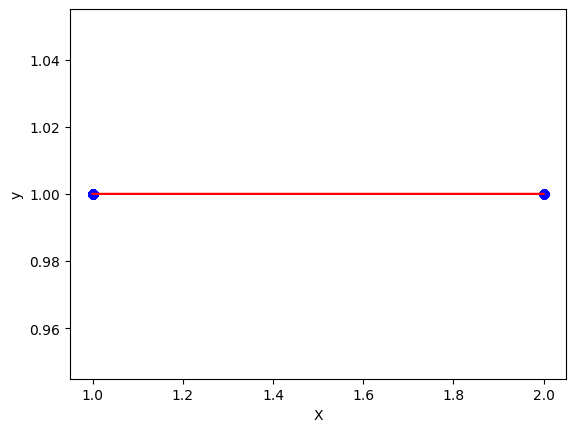

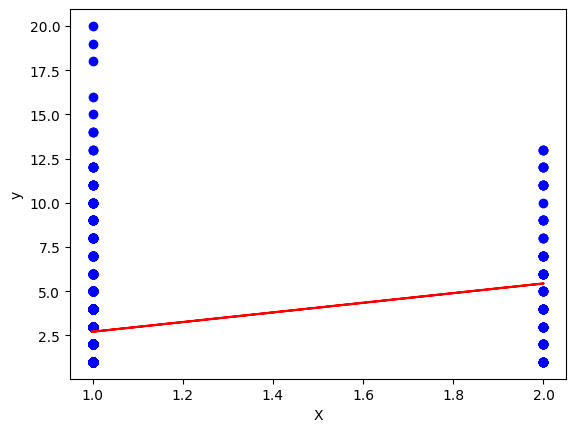

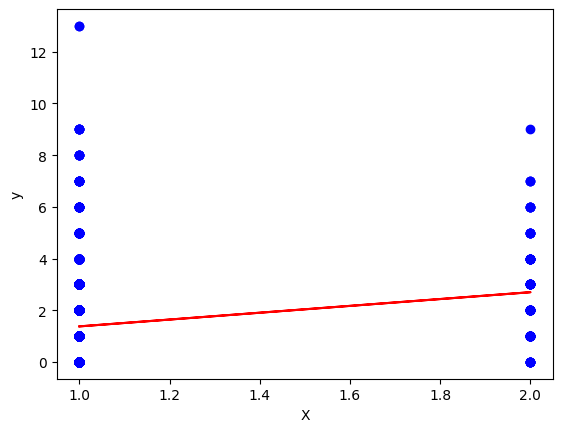

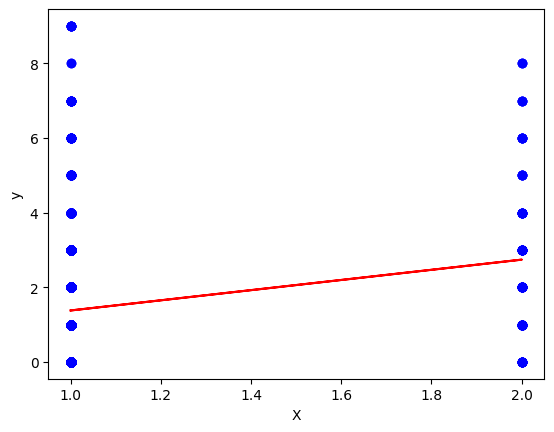

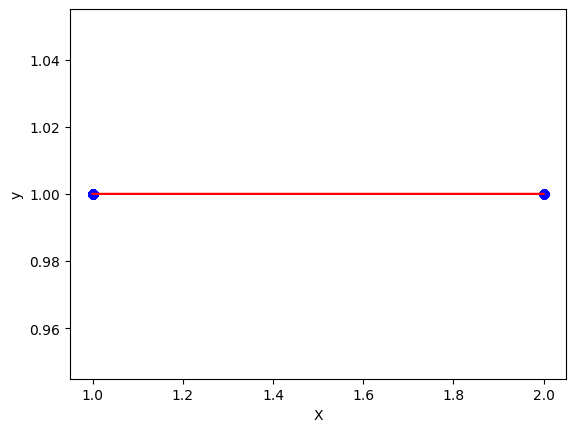

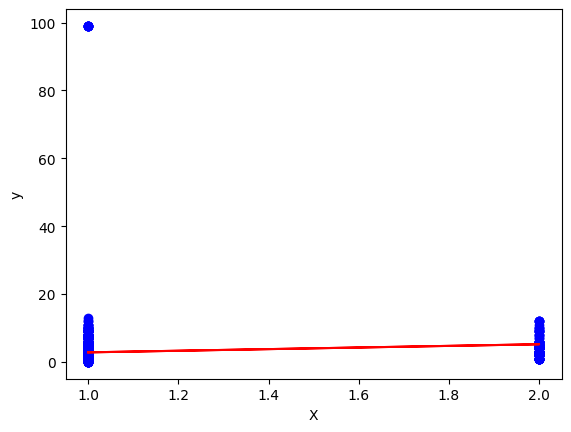

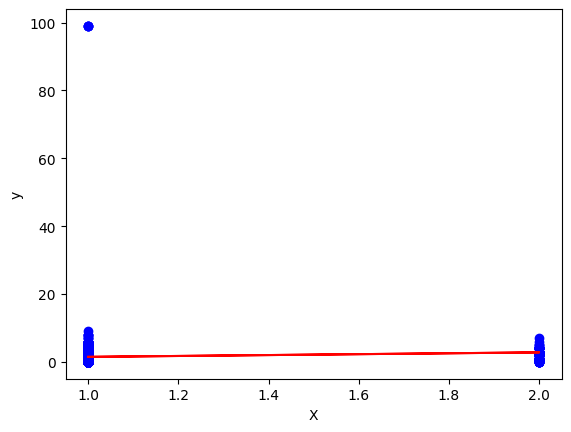

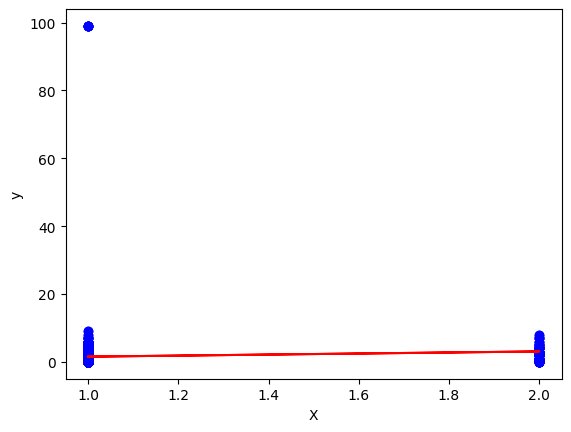

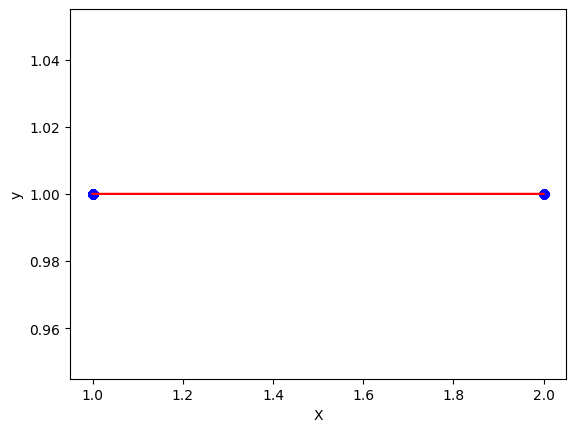

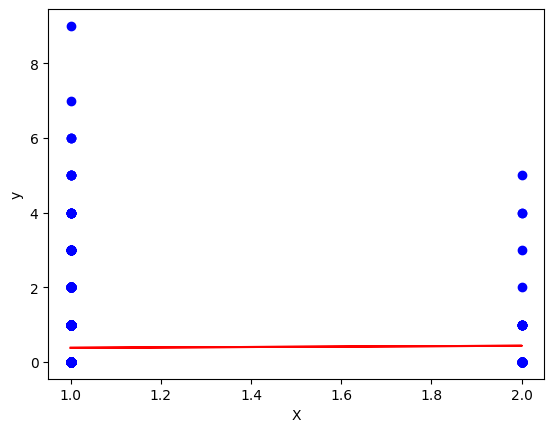

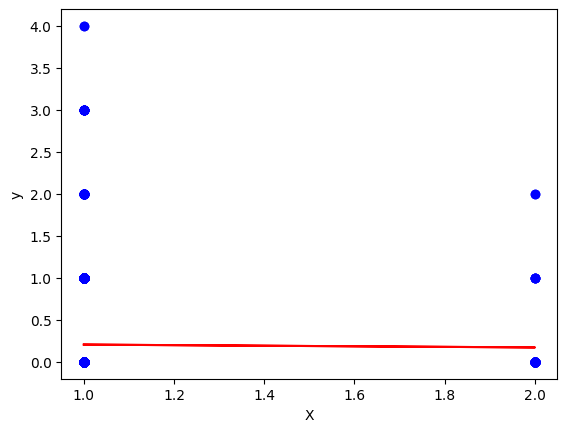

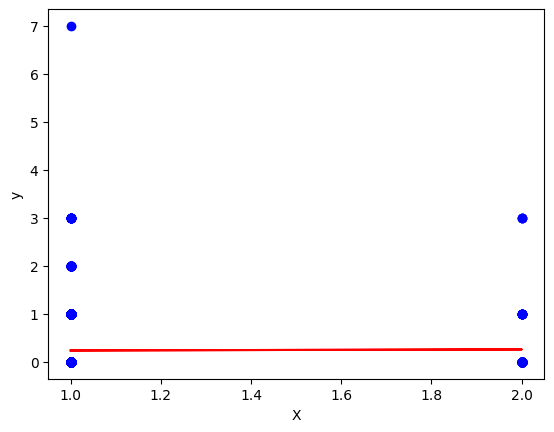

Variable Dependiente: PA_HNV
MSE: 0.0
R²: 1.0
---------------------------
Variable Dependiente: PA1_THNV
MSE: 4.863518498088339
R²: 0.04939000374962743
---------------------------
Variable Dependiente: PA2_HNVH
MSE: 2.002999356712218
R²: 0.02789687826144238
---------------------------
Variable Dependiente: PA3_HNVM
MSE: 1.8923411171365276
R²: 0.033252036568291565
---------------------------
Variable Dependiente: PA_HNVS
MSE: 0.0
R²: 1.0
---------------------------
Variable Dependiente: PA1_THSV
MSE: 32.09567600885383
R²: 0.002462456606139418
---------------------------
Variable Dependiente: PA2_HSVH
MSE: 18.32348223685883
R²: -0.0007331092962288288
---------------------------
Variable Dependiente: PA3_HSVM
MSE: 31.103178264544113
R²: 0.00014741814688945531
---------------------------
Variable Dependiente: PA_HFC
MSE: 0.0
R²: 1.0
---------------------------
Variable Dependiente: PA1_THFC
MSE: 0.5921513411300885
R²: -0.010269962216121753
---------------------------
Variable Dependiente: 

In [19]:
import matplotlib.pyplot as plt

# Convertir las predicciones a un DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=columnas_dependientes)

# Crear una lista para almacenar las métricas de cada variable dependiente
metricas_por_variable = []

# Calcular el MSE y R² para cada variable dependiente
for columna_dependiente in columnas_dependientes:
    y_actual = y_test[columna_dependiente]
    y_prediccion = y_pred_df[columna_dependiente]

    mse = mean_squared_error(y_actual, y_prediccion)
    r2 = r2_score(y_actual, y_prediccion)

    metricas_por_variable.append({"Variable Dependiente": columna_dependiente, "MSE": mse, "R²": r2})

    # Convertir las predicciones a un DataFrame
    y_pred_df = pd.DataFrame(y_pred, columns=columnas_dependientes)

    # Create scatter plot
    plt.scatter(X_test_selected, y_actual, color="blue")

    # Create line plot
    plt.plot(X_test_selected, y_prediccion, color="red")
    plt.xlabel("X")
    plt.ylabel("y")

    # Display the plot
    plt.show()

# Mostrar las métricas de cada variable dependiente
for metrica in metricas_por_variable:
    print("Variable Dependiente:", metrica["Variable Dependiente"])
    print("MSE:", metrica["MSE"])
    print("R²:", metrica["R²"])
    print("---------------------------")

 Diplomado Ciencia de Datos

                          Jose Mauricio Camacho Bravo.
                            Sandra Milena Echavarría López.

                            Facultad de Tecnología, Universidad IUD

                           Actividad de aprendizaje :S33 Modelo de clasificación


                            Profesor: Julián Andrés Castillo Grisales

                            Julio 21 del 2023

                            Universidad IUD

                            Medellín


********************************************************************************
********************************************************************************
**Introducción**

Introducción Hoy en día la información es un ámbito que está de qué hablar ya que con procesos muy bien establecidos podemos integrar procesos de aplicaciones, base de datos, etc, que nos brinda la oportunidad de tener datos a la mano y poder personalizarlos de acuerdo a la necesidad, con este trabajo se va demostrar que si se puede tener una búsqueda de datos con buenos lineamientos y tener resultados satisfactorios. Con este proceso vamos a utilizar una herramienta para el desarrollo de la actividad que nos permite analizarlos de acuerdo a lo solicitado y tener resultados satisfactorios.

Esta información corresponde al censo que se realizó en el año 2018 de hombres y mujeres por cada uno de los barrios en su totalidad, incluyendo nivel nacional en cada uno de los departamentos, ciudades, municipios, veredas, entre otros.

**Aprendizaje:**
 Describa el procedimiento realizado para el modelo de regresión.. Para realizar esta activado se hizo una consulta en el navegador de google.com.co con la palabra censada en el año 2018 ani venel nacional, alli se puede evidencia toda la informacion de acuerdo a las preguntas que estable cio el DANE para cada uno de los censados hombres o Mujeres.CSV
 https://microdatos.dane.gov.co/index.php/catalog/643/get-microdata




********************************************************************************
********************************************************************************
**Planteamiento del problema**
********************************************************************************
********************************************************************************
**Descripción del valor a predecir.**
********************************************************************************
********************************************************************************
**Crear el modelo de clasificación**
********************************************************************************
********************************************************************************
**Dividir los datos en entrenamiento y prueba**
********************************************************************************
********************************************************************************
**Predecir valores**
********************************************************************************
********************************************************************************
**Calcular las métricas de aceptación**
********************************************************************************
********************************************************************************
**Respuestas a Ruta Metodológica**
********************************************************************************
********************************************************************************
**Conclusiones**
********************************************************************************
********************************************************************************
**Desarrollo de Ruta Metodológic**
********************************************************************************
********************************************************************************
**¿El valor o dato a clasificado está bien seleccionado?**
********************************************************************************
********************************************************************************
**¿El Score o métricas del modelo se ajustan a la realidad?**
********************************************************************************
********************************************************************************
**¿Los tiempos de predicción son cortos, medianos, largos?**
********************************************************************************
********************************************************************************
**¿Qué observaciones tienes del modelo y de sus resultados?**
********************************************************************************
********************************************************************************